In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(59999, 785)

In [4]:
df.columns

Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.608', '0.609', '0.610', '0.611', '0.612', '0.613', '0.614', '0.615',
       '0.616', '0.617'],
      dtype='object', length=785)

In [5]:
df.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values

In [7]:
data.shape

(59999, 785)

In [8]:
type(data)

numpy.ndarray

In [9]:
x = data[:, 1:]
y = data[:, 0]

In [10]:
print(x.shape, y.shape)

(59999, 784) (59999,)


In [11]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
y

array([0, 4, 1, ..., 5, 6, 8], dtype=int64)

In [13]:
# train test split
split = int(0.8 * x.shape[0])

In [14]:
split

47999

In [15]:
x_train = x[:split, :]
y_train = y[:split]

In [16]:
x_test = x[split:, :]
y_test = y[split:]

In [17]:
print(x_train.shape, y_train.shape)

(47999, 784) (47999,)


In [18]:
print(x_test.shape, y_test.shape)

(12000, 784) (12000,)


In [19]:
# visualization of samples

In [20]:
def drawImage(sample):
    #reshape that image
    img = sample.reshape((28,28))
    plt.imshow(img, cmap = 'gray')
    plt.show()

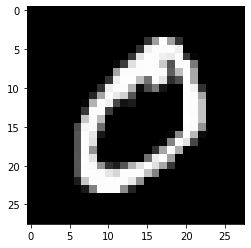

0


In [21]:
drawImage(x_train[0])
print(y_train[0])

In [22]:
# Applying K-Means Algorithm
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x, y, querypoint, k=5):
    vals = []
    # for every point in the x
    for i in range(x.shape[0]):
        # compute distance
        d = distance(querypoint, x[i])
        vals.append((d , y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_values = np.unique(vals[:, 1], return_counts = True)
    print(new_values)
        
    index = new_values[1].argmax()
    pred = new_values[0][index]
        
    return pred

In [23]:
# make predictions over test images
pred = knn(x_train, y_train, x_test[15])

(array([4.]), array([5], dtype=int64))


In [24]:
pred

4.0

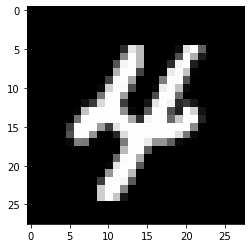

In [25]:
drawImage(x_test[15])

In [26]:
print(y_test[15])

4
